# 회귀분석_예측 11/16(월) 

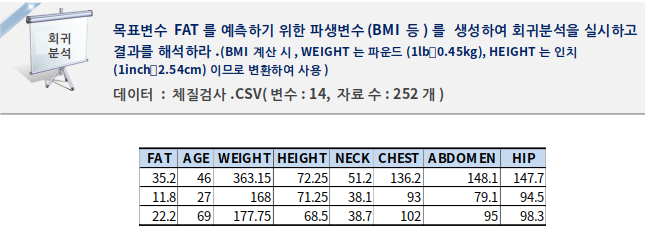

## 모듈 import

In [182]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


### STEP1 데이터 구성하기

In [194]:
df_raw =pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/체질검사.csv",engine='python',encoding='cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [195]:
df_raw['BMI']=0
# BMI 열을 추가해주었다.

In [196]:
df_raw['BMI']=((df_raw['WEIGHT']*0.45) / ((df_raw['HEIGHT']*2.54*0.01)**2)).round(1)
# WEIGHT는 파운드(1lb=0.45kg), HEIGHT는 인치(1inch=2.54cm)이므로 변환하여 BMI 추가해주었다. 

In [197]:
df_raw.head(20)
# BMI가 추가가 잘 되었다. 

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.5
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.1
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.4
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.8
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.3
5,24.2,40,202.25,70.00,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,28.8
6,23.3,52,167.00,67.75,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9,25.4
7,26.0,54,230.00,72.25,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6,30.7
8,9.0,47,184.25,74.50,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8,23.2
9,4.0,47,127.50,66.75,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8,20.0


### STEP2. 변수 간의 경향성 파악 (산점도 분석)

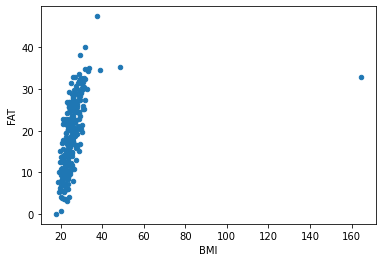

In [198]:
df_raw.plot.scatter(x='BMI',y='FAT')

In [199]:
df_raw.query('BMI>160') 
# 이상값의 인덱스를 찾기 위해 쿼리문을 사용하여 검색하였다.

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
78,32.9,44,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,164.3


In [200]:
df_raw[78:79]
# 78번 인덱스를 slide를 이용하여 검색하였다.

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
78,32.9,44,205.0,29.5,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,164.3


In [204]:
df_raw =df_raw.drop(df_raw.index[78])
# 78번 인덱스를 제거해주었다.

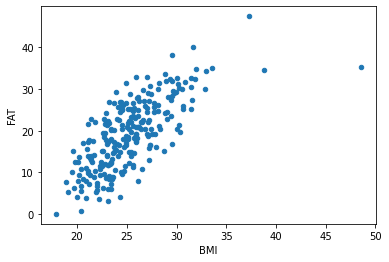

In [205]:
df_raw.plot.scatter(x='BMI',y='FAT')
# 78번 인덱스를 제거한 후 다시 scatter로 분포도를 확인하였다.

In [206]:
df_raw.describe()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,19.157600,44.960000,178.898800,70.306000,38.006800,100.848400,92.560400,99.856000,59.3788,38.582400,23.102400,32.277600,28.665600,18.235200,25.196800
std,8.299419,12.601332,29.434238,2.618452,2.434688,8.427909,10.769912,7.121114,5.2155,2.405768,1.700837,3.028482,2.028575,0.935232,3.629054
min,0.000000,22.000000,118.500000,64.000000,31.100000,79.300000,69.400000,85.000000,47.2000,33.000000,19.100000,24.800000,21.000000,15.800000,17.900000
25%,12.500000,36.000000,158.500000,68.250000,36.400000,94.450000,84.750000,95.500000,56.0250,37.025000,22.000000,30.225000,27.300000,17.600000,22.900000
50%,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.0000,38.500000,22.800000,32.050000,28.750000,18.300000,24.900000
75%,25.275000,54.000000,196.937500,72.250000,39.475000,105.300000,99.200000,103.425000,62.3000,39.900000,24.000000,34.375000,30.000000,18.800000,27.100000
max,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.3000,49.100000,33.900000,45.000000,34.900000,21.400000,48.500000


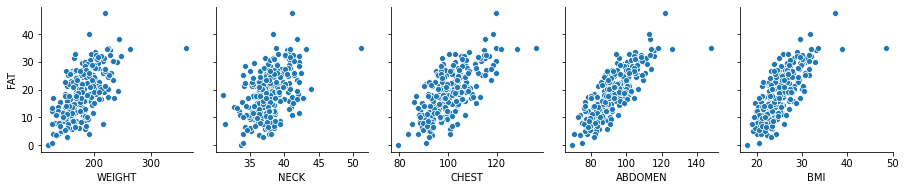

In [207]:
sns.pairplot(df_raw,y_vars='FAT',x_vars=["WEIGHT",'NECK','CHEST','ABDOMEN','BMI'])

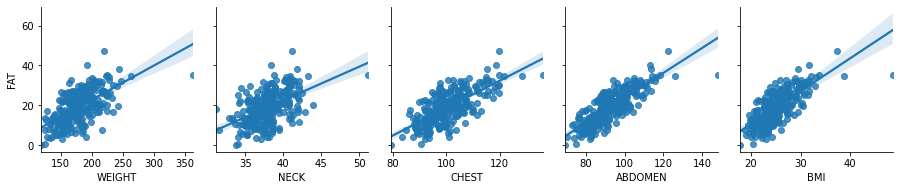

In [208]:
sns.pairplot(df_raw,y_vars='FAT',x_vars=["WEIGHT",'NECK','CHEST','ABDOMEN','BMI'],kind ='reg')

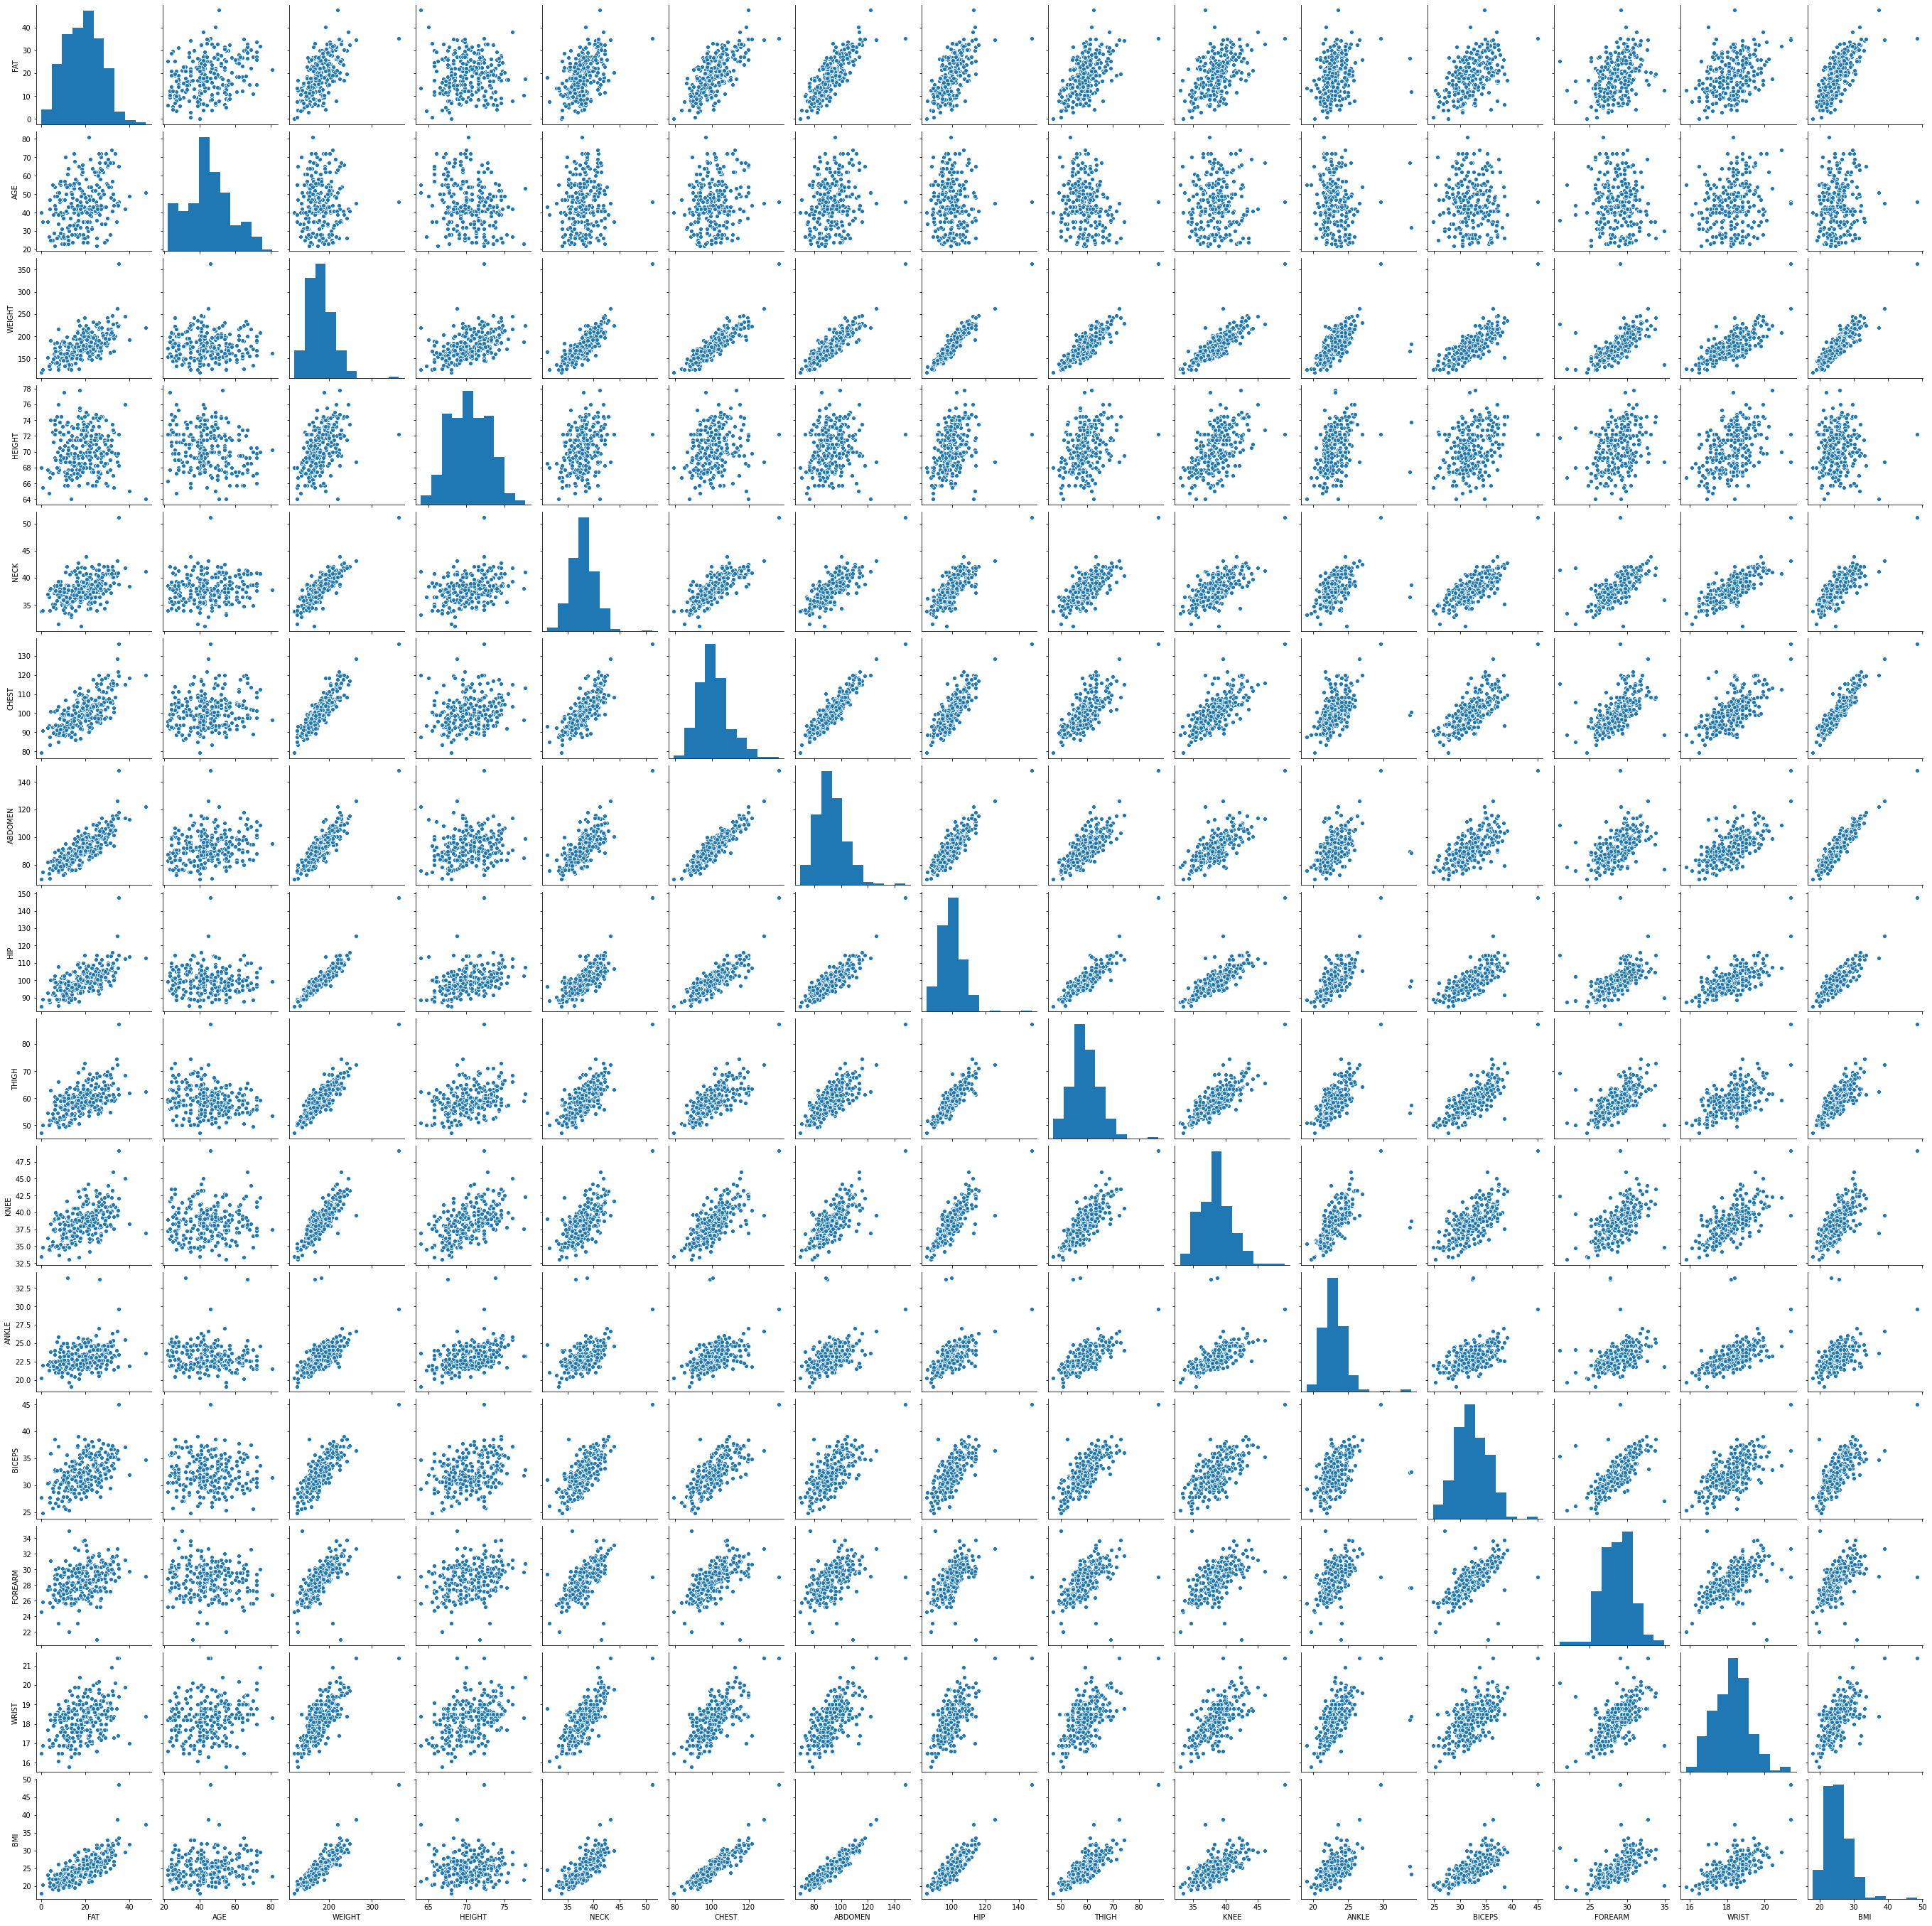

In [209]:
sns.pairplot(df_raw)

### 변수간의 경향성 파악- 상관관계분석 

In [210]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.286,0.611,-0.020,0.495,0.700,0.812,0.621,0.552,0.502,0.264,0.491,0.364,0.353,0.724
AGE,0.286,1.000,-0.016,-0.244,0.109,0.170,0.226,-0.053,-0.207,0.014,-0.107,-0.046,-0.087,0.211,0.111
WEIGHT,0.611,-0.016,1.000,0.491,0.834,0.895,0.888,0.944,0.870,0.853,0.613,0.800,0.631,0.735,0.888
HEIGHT,-0.020,-0.244,0.491,1.000,0.323,0.231,0.194,0.380,0.347,0.508,0.395,0.321,0.323,0.399,0.040
NECK,0.495,0.109,0.834,0.323,1.000,0.787,0.758,0.747,0.707,0.679,0.479,0.732,0.624,0.744,0.784
CHEST,0.700,0.170,0.895,0.231,0.787,1.000,0.916,0.833,0.731,0.719,0.483,0.727,0.581,0.664,0.910
ABDOMEN,0.812,0.226,0.888,0.194,0.758,0.916,1.000,0.876,0.765,0.735,0.453,0.684,0.505,0.626,0.922
HIP,0.621,-0.053,0.944,0.380,0.747,0.833,0.876,1.000,0.895,0.821,0.561,0.743,0.550,0.645,0.885
THIGH,0.552,-0.207,0.870,0.347,0.707,0.731,0.765,0.895,1.000,0.796,0.542,0.764,0.572,0.572,0.813
KNEE,0.502,0.014,0.853,0.508,0.679,0.719,0.735,0.821,0.796,1.000,0.612,0.679,0.559,0.674,0.708


###  체질 비만도(FAT)와  가슴 둘레(CHEST), 복부둘레(ABDOMEN)간의 높은 선형관계 확인
### 설명변수 상관관계: 다수 설명변수 간의 선형관계 확인 -> 다중 공선성 확인 및 처리 필요

### STEP3. 회귀 모델 생성: 설명변수 전체 

In [211]:
reg_model = smf.ols(formula='FAT~ AGE+WEIGHT+ HEIGHT + NECK + CHEST + ABDOMEN + HIP+ THIGH + KNEE + ANKLE +BICEPS+ FOREARM + WRIST+BMI',data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     51.04
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           4.43e-63
Time:                        21:46:03   Log-Likelihood:                -708.73
No. Observations:                 250   AIC:                             1447.
Df Residuals:                     235   BIC:                             1500.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -153.5789     52.536     -2.923      0.0

In [212]:
#### No. Observation(분석 자료 수 ) : 252 Df REsiduals(잔차 자유도) : 237 Df Model(모델 자유도): 14
#### 분산 분석 결과 p값이 유의수준보다 0.05보다 작으므로 회귀모델로서 유의
#### 설명력: 0.749 모델을 통하여 설명변수 EVAL을 74.9% 를 설명할 수 있음
#### 회귀계수 검정 , 절편의 유의성은 검토하지 않음.
#### NECK, ABDOMEN,FOREARM,WRIST의 p값이 유의수준 0.05보다 작으므로 유의
#### BMI는 유의하지 않다.

### STEP3. 회귀 모델 생성: 설명변수 간의 다중공선성 확인 

In [213]:
#설명변수 간의 다중공선성 확인: 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop("FAT",axis= 1)
# statsmodels 의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

In [214]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#다중 공선성 확인
from sklearn.linear_model import LinearRegression
# 선형회귀모형
from sklearn.feature_selection import RFE
#변수 선택법(후진제거법)
from sklearn.preprocessing import StandardScaler
#Scale 변환 => 표준화 회귀계수 산출

In [215]:
df_vif= pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i)for i in range(df_raw_x_const.shape[1])]
# vif로 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,variable,VIF
10,ANKLE,1.943
1,AGE,2.256
12,FOREARM,2.260
13,WRIST,3.387
11,BICEPS,3.664
4,NECK,4.435
9,KNEE,4.857
8,THIGH,7.898
5,CHEST,10.718
6,ABDOMEN,13.365


In [229]:
df_raw_x = df_raw.drop(['BMI',"WEIGHT"], axis= 1)
df_raw_x_const = add_constant(df_raw_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_raw_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)
# 다중공선성 문제 해결됨

,variable,VIF
3,HEIGHT,1.771
10,ANKLE,1.844
2,AGE,2.216
12,FOREARM,2.245
13,WRIST,3.450
11,BICEPS,3.505
1,FAT,3.874
4,NECK,4.051
9,KNEE,4.718
8,THIGH,7.810


In [230]:
reg_model = smf.ols(formula='FAT~ AGE+ HEIGHT + NECK + CHEST + ABDOMEN + HIP+ THIGH + KNEE + ANKLE +BICEPS+ FOREARM + WRIST+BMI',data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     52.19
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           7.61e-62
Time:                        21:48:14   Log-Likelihood:                -713.97
No. Observations:                 250   AIC:                             1456.
Df Residuals:                     236   BIC:                             1505.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7391      8.950      1.200      0.2

In [231]:
df_raw_y = df_raw['FAT']
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 6).fit(df_raw_x, df_raw_y)
selected_cols = df_raw_x.columns[rfe.support_]
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))

Selected Variables:Index(['FAT', 'NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables:Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [232]:
rfe_reg_model = smf.ols(formula='FAT~NECK + ABDOMEN + HIP + FOREARM + WRIST+BMI',data=df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     109.6
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           2.94e-66
Time:                        21:48:24   Log-Likelihood:                -719.49
No. Observations:                 250   AIC:                             1453.
Df Residuals:                     243   BIC:                             1478.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8638      7.041      0.975      0.3

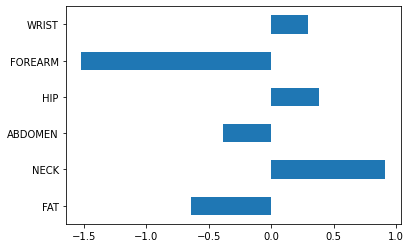

In [233]:
df_reg_coef=pd.DataFrame({'Coef':rfe_reg_result.params.values[1:]}, index=selected_cols)
df_reg_coef.plot.barh(y='Coef', legend=False)

In [234]:
scaler = StandardScaler()
cols=df_raw_x.columns
np_scaled= scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(np_scaled,columns=cols)
df_scaled['FAT']=df_raw['FAT']
reg_model_scaled = smf.ols(formula = 'FAT ~NECK + ABDOMEN + HIP+ FOREARM+ WRIST',data =df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     5.223
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           0.000142
Time:                        21:48:33   Log-Likelihood:                -864.45
No. Observations:                 248   AIC:                             1741.
Df Residuals:                     242   BIC:                             1762.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1578      0.508     37.726      0.0

# 최종 모델의 회귀식 y^ =19.1578 -0.0507*NECK +3.3583*ABDOMEN -0.4193 *HIP -0.1527* FOREARM -0.5777*WRIST

# 의사결정나무_예측 

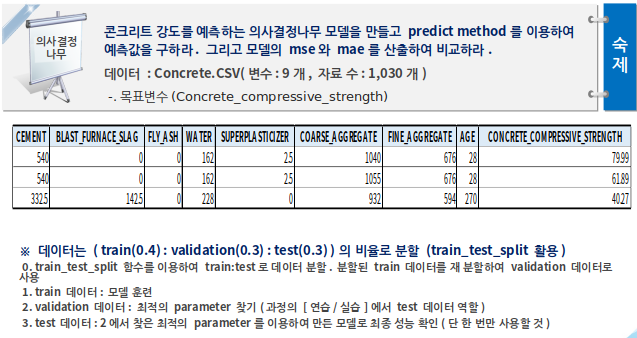

### STEP1. 데이터 구성하기

In [19]:
df_raw =pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/Concrete.csv",engine='python',encoding='cp949')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### STEP1. Tree 시각화 패키지 설치

In [43]:
import os
os.environ["PATH"]+=os.pathsep + "./anaconda3/lib/python3.8/site-packages/sphinx/templates/graphviz"
import graphviz

### 데이터 구성하기

In [44]:
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH",axis=1, inplace=False)

In [99]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
df_train_x, df_validation_x, df_train_y,df_validation_y = train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)
# 데이터 셋을 7:3으로 train 과 test로 나눴다.
# train 을 0.5714 : 0.429 로 나눴다.
# 따라서 train : validation : test = 4 : 3: 3 이 되었다.

In [100]:
print(" train data X size:{}".format(df_train_x.shape))
print(" train data Y size:{}".format(df_train_y.shape))
print(" validation data X size:{}".format(df_validation_x.shape))
print(" validation data Y size:{}".format(df_validation_y.shape))
print(" test data X size:{}".format(df_test_x.shape))
print(" test data Y size:{}".format(df_test_y.shape))
# train : validation : test = 4 : 3: 3 이 되었는지 확인해보았다. 그결과 split이 잘 되었다. 

 train data X size:(412, 8)
 train data Y size:(412,)
 validation data X size:(309, 8)
 validation data Y size:(309,)
 test data X size:(309, 8)
 test data Y size:(309,)


In [101]:
tree_uncustomized = DecisionTreeRegressor(random_state =1234)
tree_uncustomized.fit(df_validation_x, df_validation_y)
print("Socor on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on Validation set: {:.3f}".format(tree_uncustomized.score(df_validation_x, df_validation_y)))
tree_uncustomized #과적합 되어 있다.

Socor on training set: 0.727
Score on Validation set: 0.999


DecisionTreeRegressor(random_state=1234)

In [48]:
tree_uncustomized

DecisionTreeRegressor(random_state=1234)

In [102]:
train_score = []; validation_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = validation_score

In [103]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidationScore
0,1,1.000,0.705
1,2,0.984,0.687
2,3,0.962,0.727
3,4,0.948,0.761
4,5,0.918,0.713
5,6,0.908,0.701
6,7,0.889,0.718
7,8,0.876,0.720
8,9,0.862,0.725
9,10,0.857,0.732


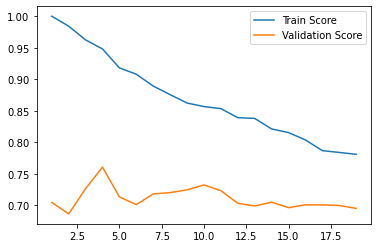

In [104]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, validation_score, linestyle = "-", label = "Validation Score")
plt.legend()
#3과 5 선택해서 비교

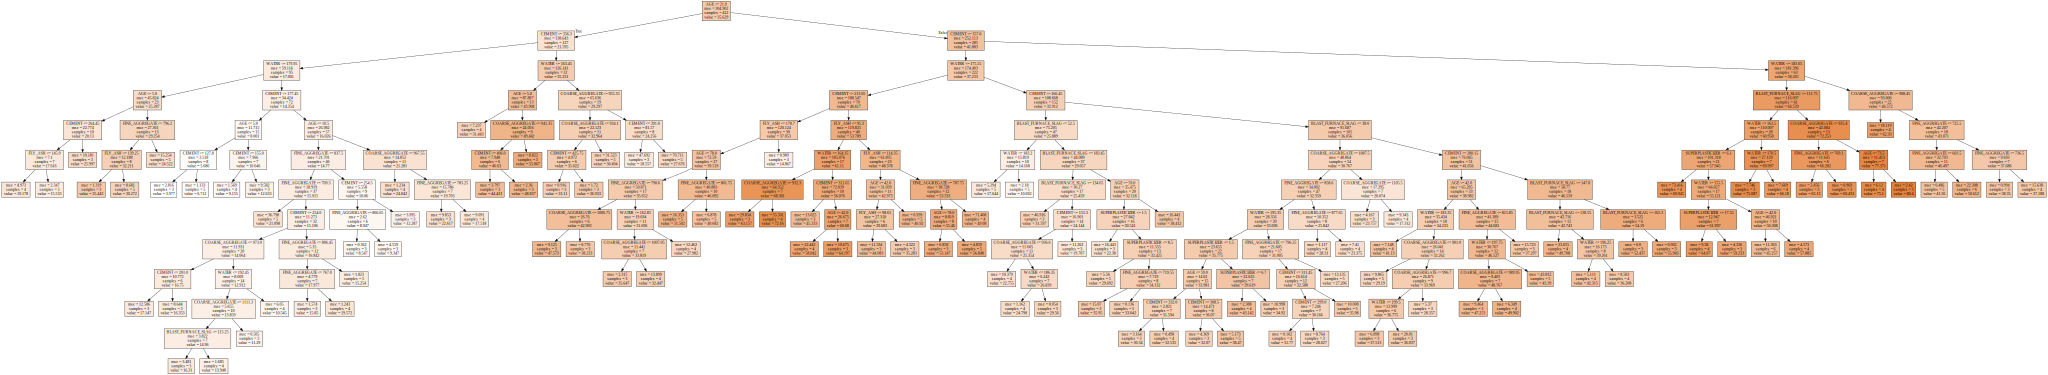

In [105]:
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 = 3모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=3)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

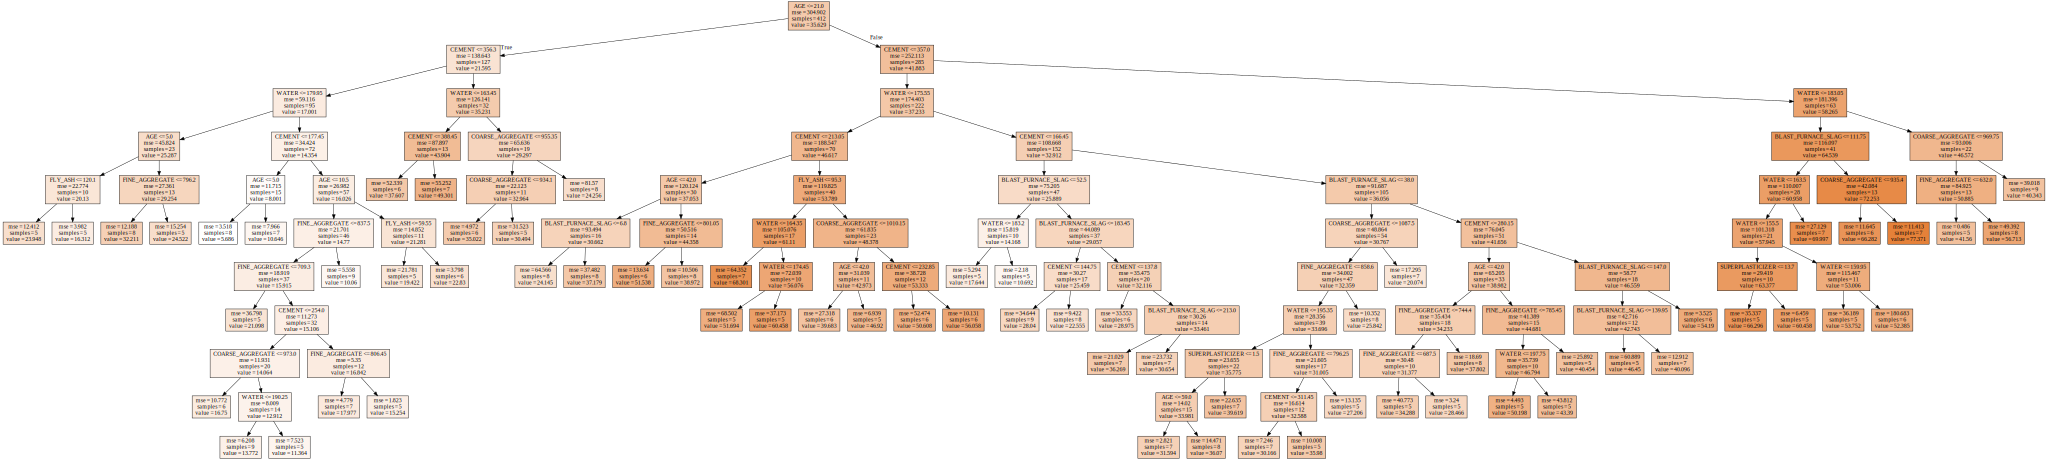

In [106]:
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 = 5모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [107]:
train_score = []; validation_score = []
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = validation_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,ValidationScore
0,4,0.918,0.681
1,6,0.918,0.681
2,8,0.918,0.681
3,10,0.918,0.681
4,12,0.910,0.685
5,14,0.894,0.685
6,16,0.886,0.673
7,18,0.874,0.670
8,20,0.866,0.662
9,22,0.860,0.657


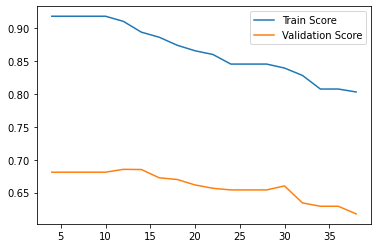

In [108]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, validation_score, linestyle = "-", label = "Validation Score")
plt.legend()
#12, 24선택

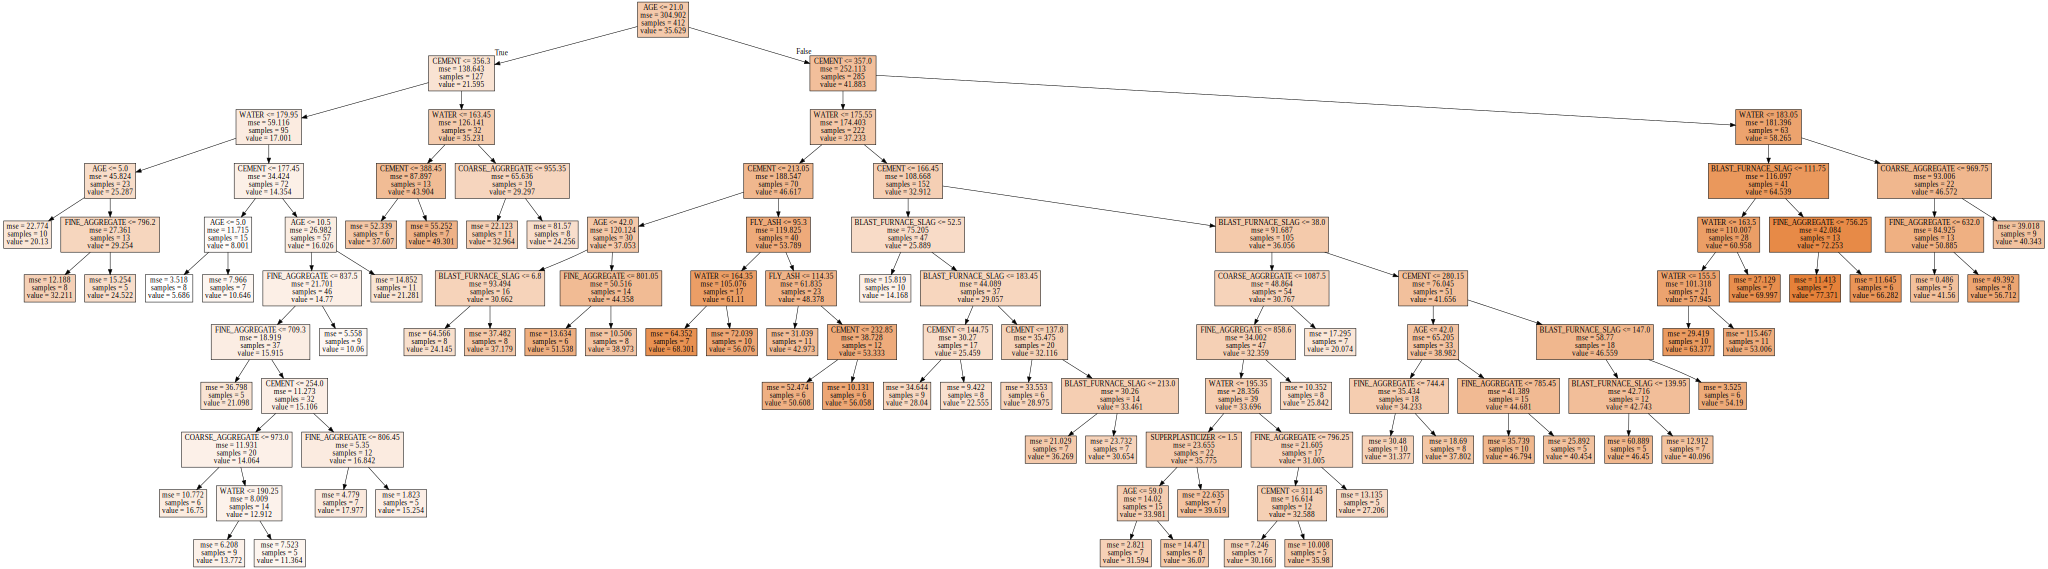

In [109]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=12)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

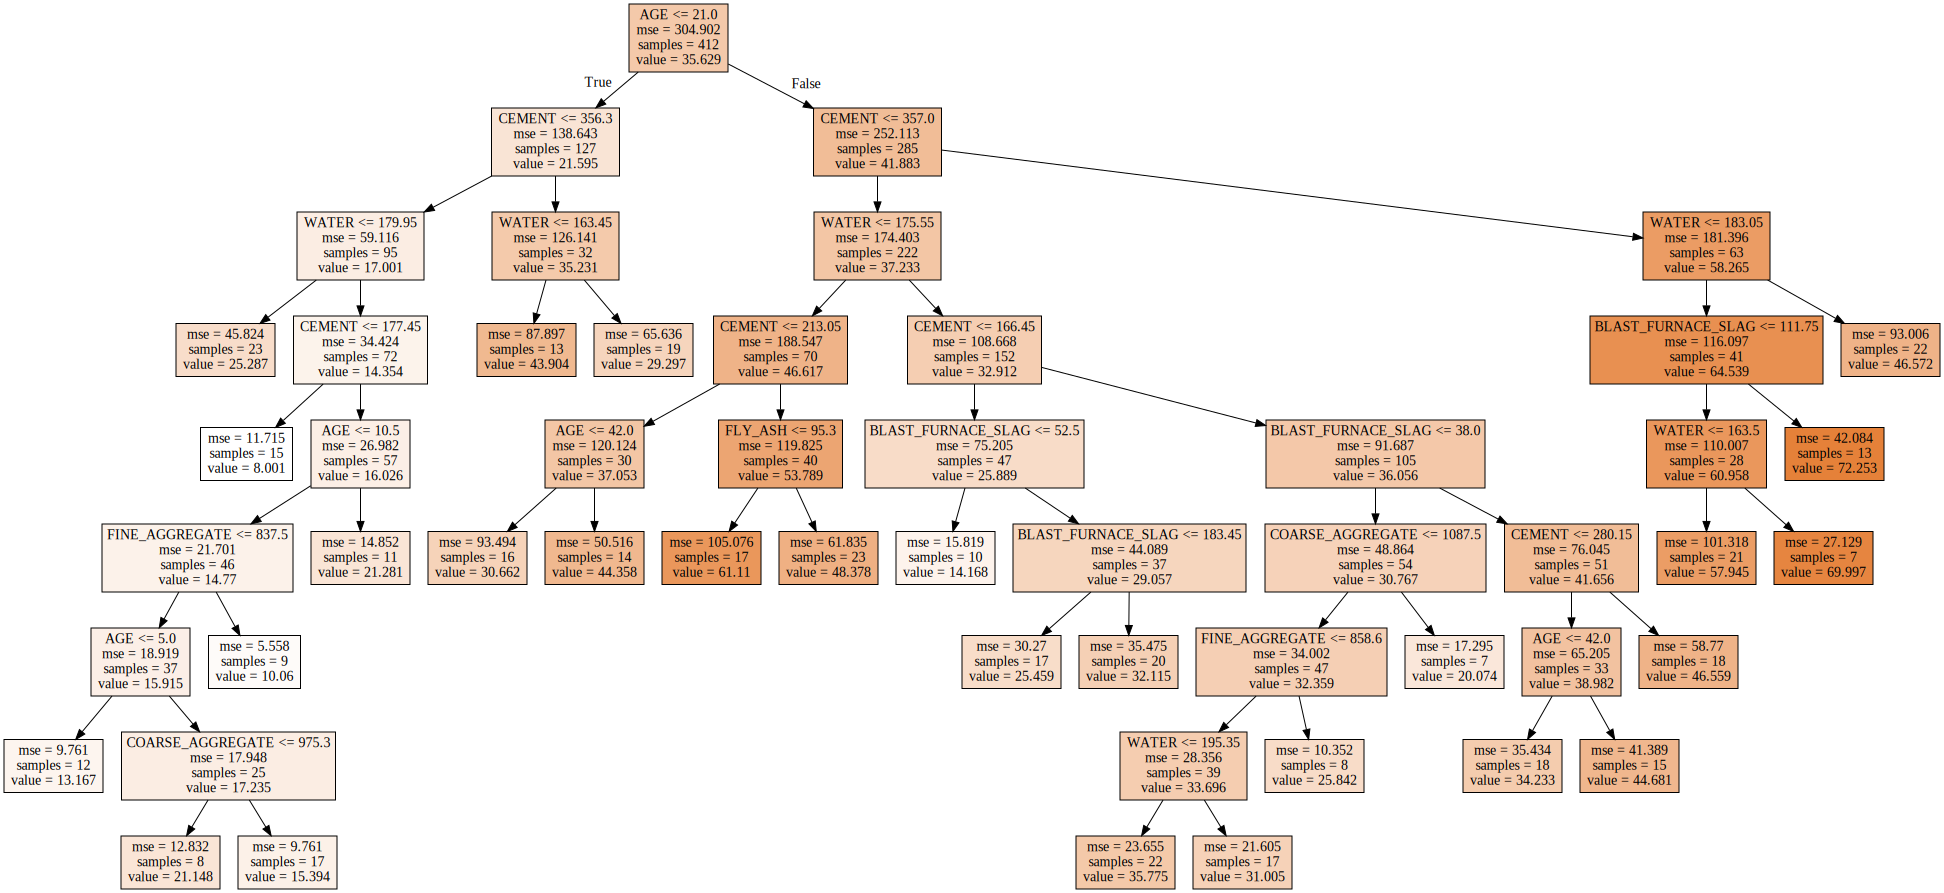

In [95]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=6, min_samples_split=24)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

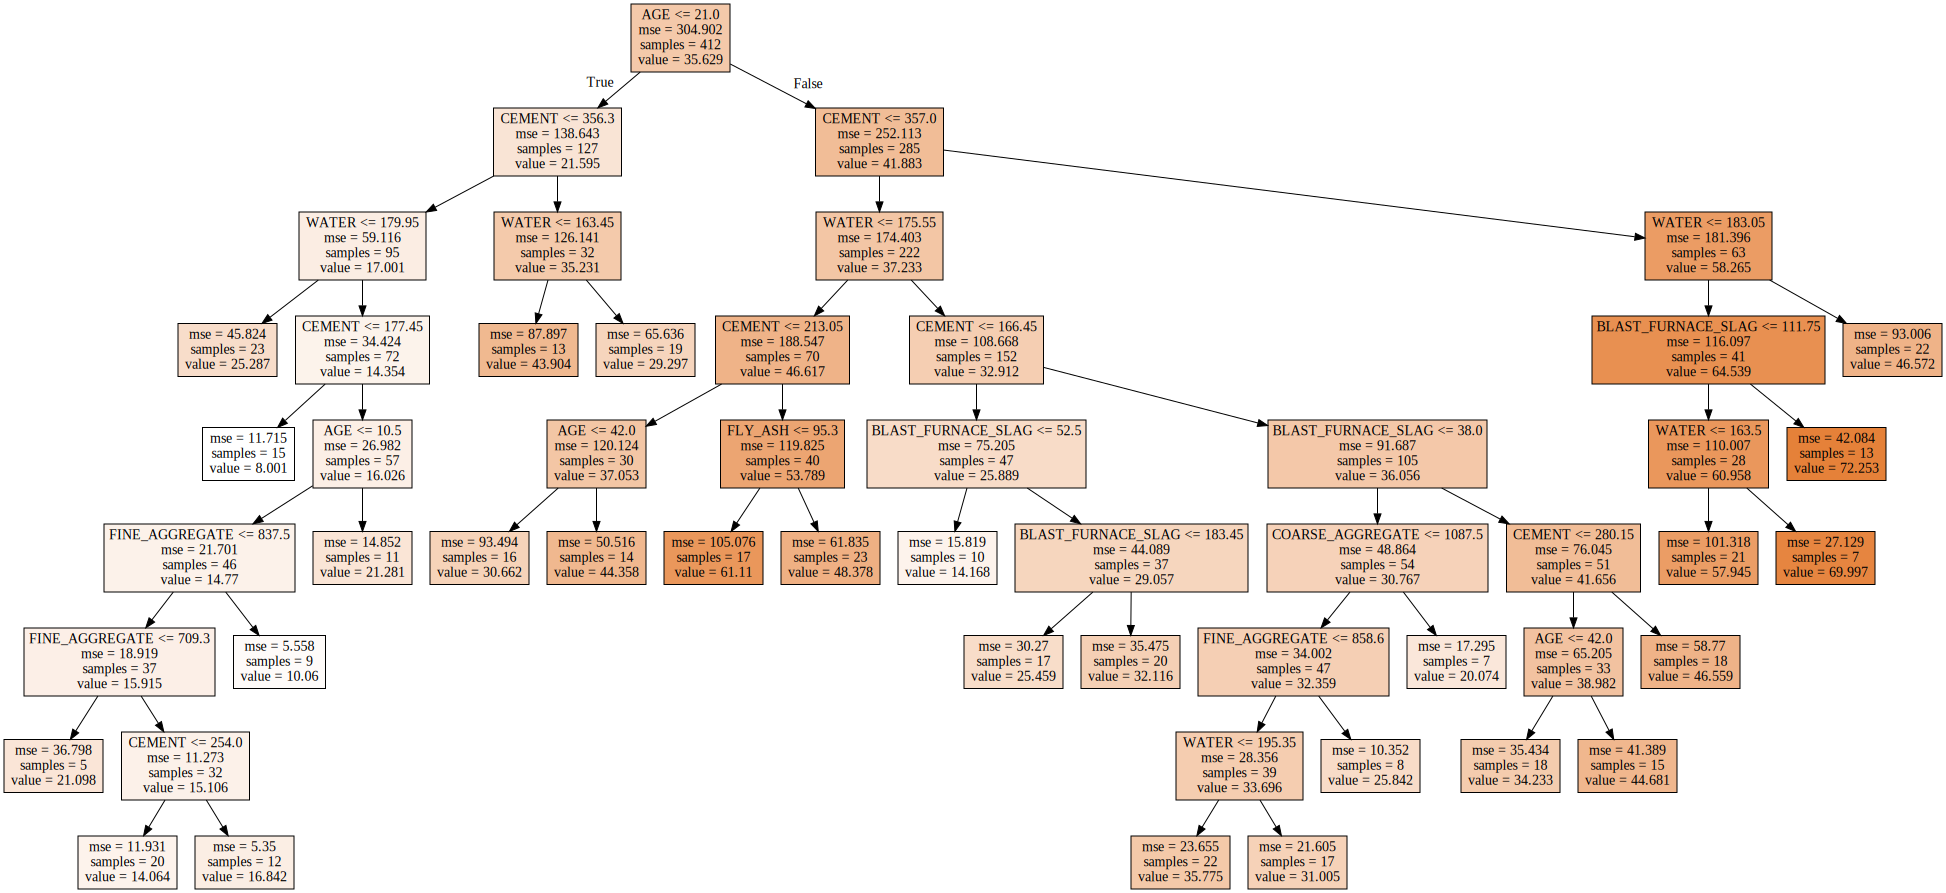

In [110]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=24)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [111]:
#모델 파라미터 조정
train_score = []; validation_score = []
para_depth = [n_depth * 1 for n_depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5,min_samples_split = 12, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split["Depth"] = para_depth
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = validation_score
df_score_split.round(3)

,Depth,TrainScore,ValidationScore
0,1,0.288,0.190
1,2,0.524,0.400
2,3,0.662,0.482
3,4,0.757,0.566
4,5,0.839,0.603
5,6,0.881,0.639
6,7,0.899,0.677
7,8,0.906,0.668
8,9,0.909,0.680
9,10,0.910,0.685


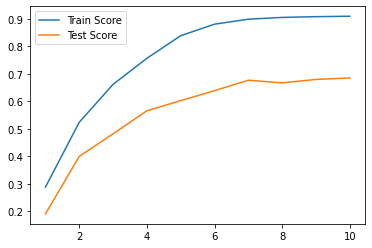

In [113]:

plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, validation_score, linestyle = "-", label = "Test Score")
plt.legend()

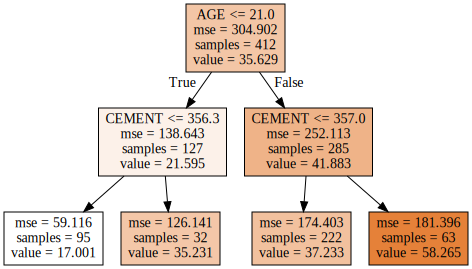

In [114]:
#최대 깊이=2모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=12,max_depth=2)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_split.dot",
feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

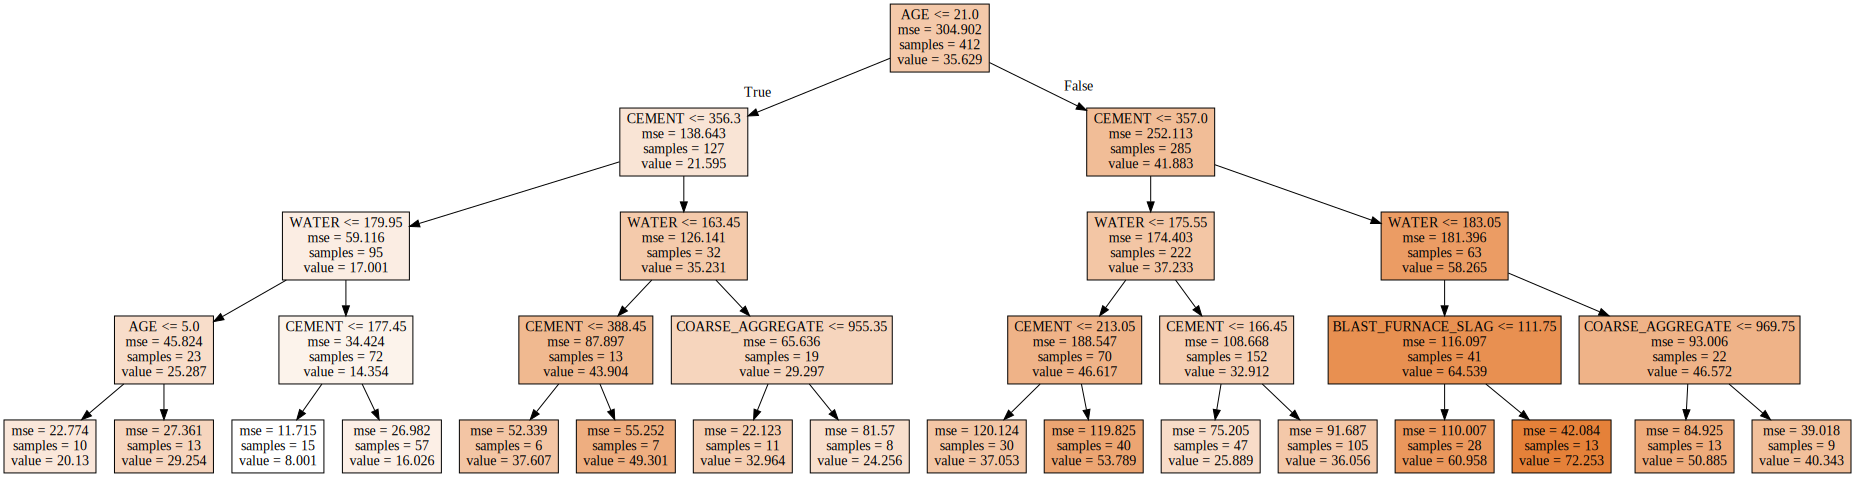

In [117]:
#최대 깊이=6모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,min_samples_split=12,max_depth=4)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_depth.dot', feature_names=v_feature_name, impurity=True, filled= True)
with open("tree_depth.dot")as f:
        dot_graph =f.read()
display(graphviz.Source(dot_graph))
#2는 과소적합이므로 6선택

In [118]:
#최종모델
tree_final = DecisionTreeRegressor(min_samples_leaf = 5, min_samples_split = 12, max_depth=4,random_state =1234,)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=12,
                      random_state=1234)

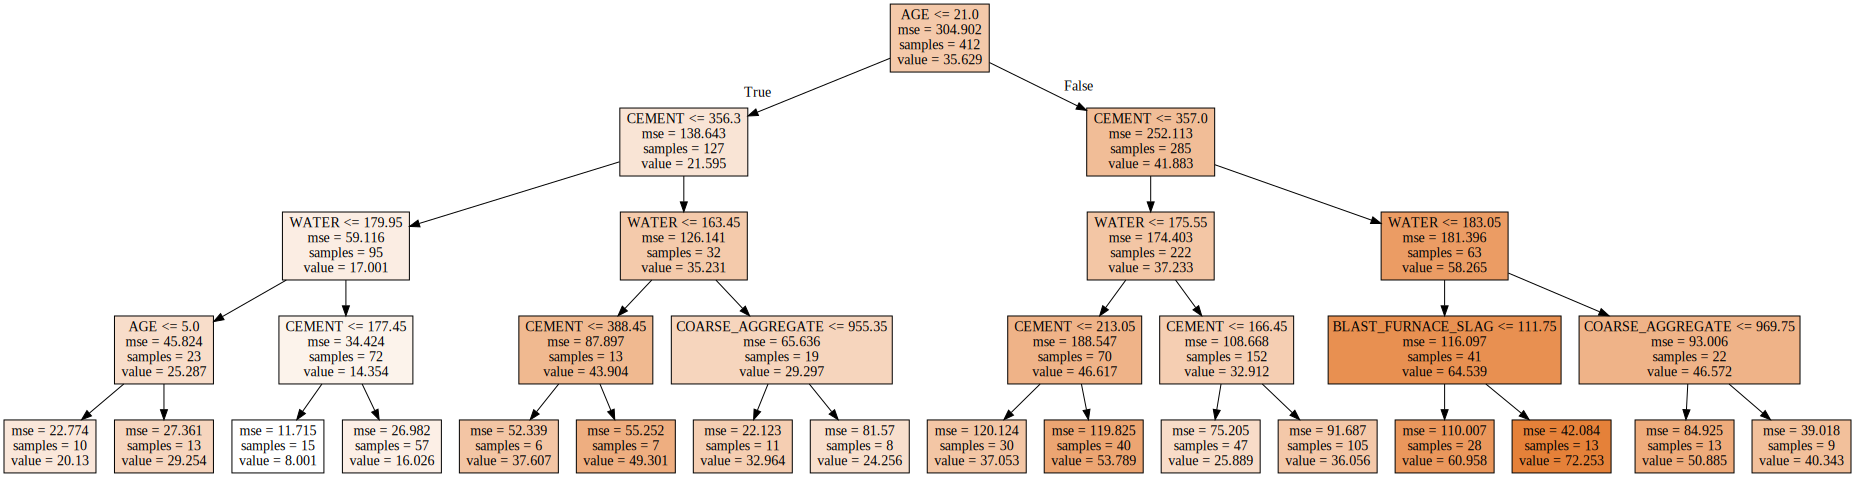

In [119]:
#최종모델 시각화
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
#트리 분리에 영향이 큰 변수는 AGE와 CEMENT

In [120]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
0,CEMENT,0.410
7,AGE,0.385
3,WATER,0.183
1,BLAST_FURNACE_SLAG,0.012
5,COARSE_AGGREGATE,0.010
2,FLY_ASH,0.000
4,SUPERPLASTICIZER,0.000
6,FINE_AGGREGATE,0.000


Text(0, 0.5, 'Variable')

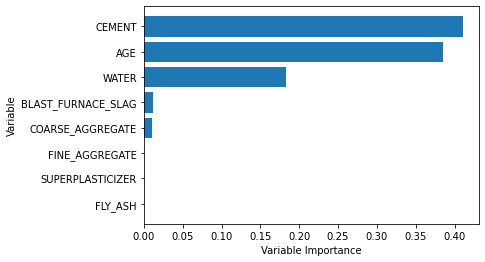

In [121]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

In [122]:
df_pred = pd.DataFrame({'prediction':tree_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,309.000000
mean,36.245060
std,14.343087
min,8.000667
25%,25.889149
50%,36.055810
75%,49.301429
max,72.253077


In [123]:
df_test_y.describe() #실제값

count    309.000000
mean      36.201586
std       16.167769
min        4.570000
25%       24.240000
50%       35.230000
75%       46.640000
max       79.400000
Name: CONCRETE_COMPRESSIVE_STRENGTH, dtype: float64

##  실제값과 예측값이 비슷하므로 모델을 잘 설계한 것 같다.

### 추가적으로 해본 것)GridSeachCV를 이용하여 Parameter 찾기

In [79]:
para_depth= [depth for depth in range(1,11)]
para_leaf = [n_leaf*1 for n_leaf in range(1,20)]
estimator= DecisionTreeRegressor()
param_grid={"criterion":["mse",'friedman_mse'],"max_features":['auto','sqrt','log2'],"max_depth":para_depth,"min_samples_split":para_leaf}

grid_dt =GridSearchCV(estimator,param_grid,scoring="r2",n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print(grid_dt.best_estimator_)
print(grid_dt.best_params_)
print(grid_dt.best_score_.round(3))


DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='auto', min_samples_split=6)
{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 6}
0.802


In [80]:
#DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
#                      max_features='auto', min_samples_split=6)
#{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 6}
#0.802

In [82]:
tree_final=DecisionTreeRegressor(random_state=1234,criterion='friedman_mse', max_depth=10, max_features='auto', min_samples_split=6)
tree_final.fit(df_rtrain_x,df_rtrain_y)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='auto', min_samples_split=6)

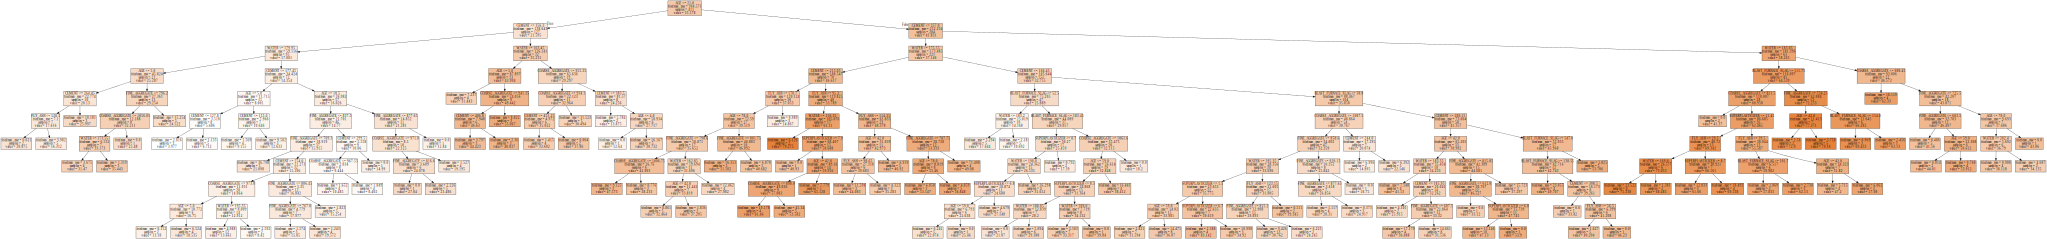

In [84]:
v_feature_name = df_rtrain_x.columns

export_graphviz(tree_final,out_file='tree_final.dot',feature_names = v_feature_name, impurity =True,filled=True)
with open('tree_final.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [85]:
# 트리 분리에 영향이 큰 변수는 AGE, friedman_mse, samples, value등이  있다.
# AGE <= 21.0 이면 True(CEMENT <= 356.3 조건이 생겼고 samples(자료수) 411 => 127 로 감소하고 value 35.57=> 21.595로 감소하고  friedman_mse  304.571=> 138.643  로 감소하였다., )
# 최대 깊이가 증가하면서 생성되는 잎사귀의 자료수는 감소하고 모델의 MSE 또한 지속적으로 감소하지만, 분리조건에 따라 콘크리트 강도는 상위 노드 대비 증가하거나 감소함. 

#  랜덤 포레스트_예측


In [124]:
df_raw =pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/Concrete.csv",engine='python',encoding='cp949')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [126]:
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]

df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH",axis=1, inplace=False)

df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

df_train_x, df_validation_x, df_train_y,df_validation_y = train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)

# 데이터 셋을 7:3으로 train 과 test로 나눴다.

# train 을 0.5714 : 0.429 로 나눴다.

# 따라서 train : validation : test = 4 : 3: 3 이 되었다.


In [127]:


print(" train data X size:{}".format(df_train_x.shape))

print(" train data Y size:{}".format(df_train_y.shape))

print(" validation data X size:{}".format(df_validation_x.shape))

print(" validation data Y size:{}".format(df_validation_y.shape))

print(" test data X size:{}".format(df_test_x.shape))

print(" test data Y size:{}".format(df_test_y.shape))

# train : validation : test = 4 : 3: 3 이 되었는지 확인해보았다. 그결과 split이 잘 되었다. 


 train data X size:(412, 8)
 train data Y size:(412,)
 validation data X size:(309, 8)
 validation data Y size:(309,)
 test data X size:(309, 8)
 test data Y size:(309,)


In [129]:
# 모델 생성
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on validation set:{:3f}".format(rf_uncustomized.score(df_validation_x, df_validation_y)))
#과적합 일 것이라 추측

Score on training set:0.982
Score on validation set:0.821457


In [130]:
rf_uncustomized

RandomForestRegressor(random_state=1234)

In [131]:
train_score = []; validation_score =[]
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["ValidationScore"] = validation_score
df_score_n.round(3)

,n_estimators,TrainScore,ValidationScore
0,10,0.975,0.789
1,20,0.979,0.806
2,30,0.981,0.808
3,40,0.982,0.813
4,50,0.982,0.812
5,60,0.983,0.816
6,70,0.982,0.817
7,80,0.982,0.816
8,90,0.982,0.820
9,100,0.982,0.821


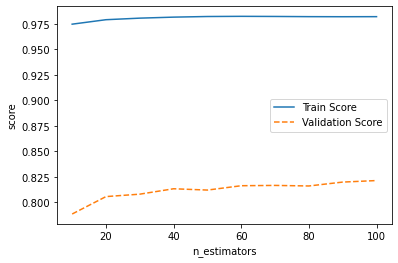

In [132]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, validation_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()
#30개를 초과해도 설명력이 거의 상승하지 않으나, 최대 트리 수에 따른 영향을 배제하고 다른 파라미터의 영향을 확인하고자 100선택

In [133]:
train_score = []; validation_score =[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_validation_x, df_validation_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = validation_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidationScore
0,1,0.982,0.821
1,2,0.969,0.810
2,3,0.952,0.803
3,4,0.936,0.790
4,5,0.922,0.778
5,6,0.908,0.768
6,7,0.895,0.755
7,8,0.882,0.748
8,9,0.870,0.741
9,10,0.862,0.733


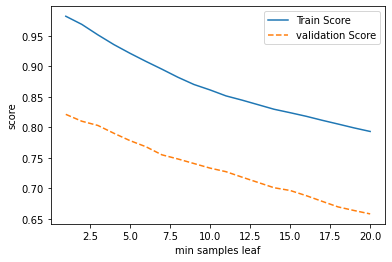

In [134]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()
#Train과 Validation이 가장 적게 차이나는 14선택

In [135]:
train_score = []; validation_score =[]
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                              min_samples_leaf = 14, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_validation_x, df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["validationScore"] = validation_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,validationScore
0,4,0.830,0.701
1,6,0.830,0.701
2,8,0.830,0.701
3,10,0.830,0.701
4,12,0.830,0.701
5,14,0.830,0.701
6,16,0.830,0.701
7,18,0.830,0.701
8,20,0.830,0.701
9,22,0.830,0.701


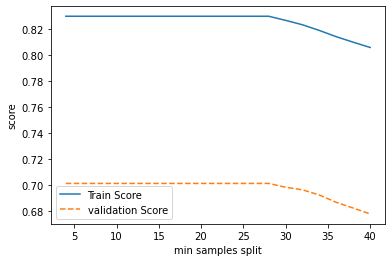

In [136]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()
#급격히 감소하는 28선택

In [137]:
train_score = []; validation_score =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                              min_samples_leaf = 14, min_samples_split = 28, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_validation_x, df_validation_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["validationScore"] = validation_score
df_score_depth.round(3)

,Depth,TrainScore,validationScore
0,1,0.435,0.324
1,2,0.650,0.516
2,3,0.751,0.615
3,4,0.807,0.676
4,5,0.826,0.697
5,6,0.829,0.701
6,7,0.830,0.701
7,8,0.830,0.701
8,9,0.830,0.701
9,10,0.830,0.701


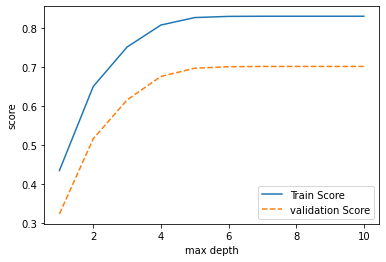

In [138]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()
#값이 급격하게 변화하는 2선택

In [139]:

rf_final = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 14,
                                min_samples_split  = 28, max_depth =2)
rf_final.fit(df_train_x, df_train_y)
print("Score on training set: {:.3}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on validation set: {:.3}".format(rf_final.score(df_validation_x, df_validation_y)))

Score on training set: 0.65
Score on validation set: 0.516


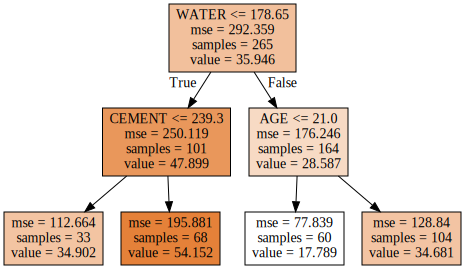

In [140]:
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


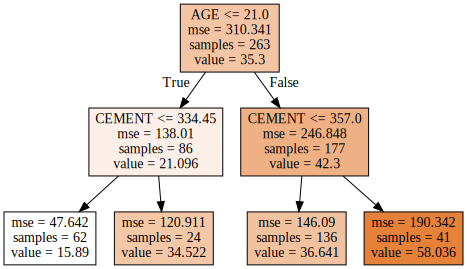

In [141]:
export_graphviz(rf_final.estimators_[1], out_file ="rfr_final_1.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

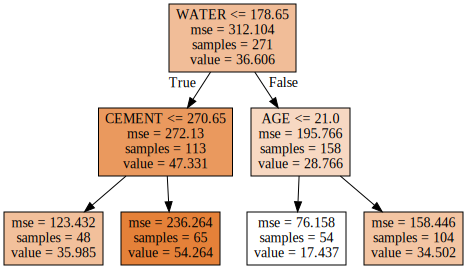

In [142]:

export_graphviz(rf_final.estimators_[10], out_file ="rfr_final_10.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [143]:

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.402
0,CEMENT,0.301
3,WATER,0.290
4,SUPERPLASTICIZER,0.007
1,BLAST_FURNACE_SLAG,0.001
2,FLY_ASH,0.000
5,COARSE_AGGREGATE,0.000
6,FINE_AGGREGATE,0.000


Text(0, 0.5, 'Variable')

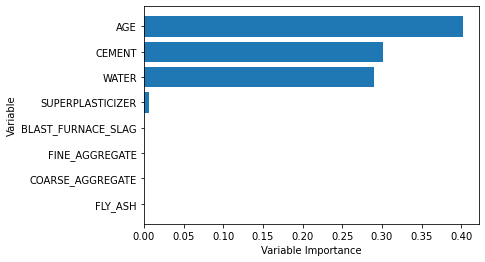

In [144]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")